# Graphviz and Python
*Nodes and Edges and Graphs Oh My*

Not this kind of graph ...

![Image](notThatKindOfGraph.svg)

This kind of graph ...

![Image](example1.svg)

## Introducting Graphviz

* https://graphviz.org
* Diagram as code tool similar to [PlantUml](https://plantuml.com) and [Mermaid](https://mermaidjs.org)
* Available for Linux, Mac, and Windows
* Originally released in 1991, Latest release 2025-12-13


### Why create diagrams as code?

* Allows diagrams to be easily version-controlled
* Can save a lot of dragging connectors around when dealing with complex graphs
* Generation of code is easy to automate


In [1]:
!dot -Tsvg example1.dot > example1.svg

### The DOT Language

* The language used to define graphs in Graphviz
* DOT files typically have a `.gv` or `.dot`
* Example DOT file and it's graph:

```dot
digraph example1{  // directed graph
    rankdir="LR";  // set attribute of graph
    A -> B -> C;   // 3 nodes and the edges between
}
```

![example1](example1.svg)

### Graphviz Commands

Graphviz consists of a number of command line programs:

* Layout Engines (render diagrams from DOT code): `dot`, `neato`, `fdp`, `sfdp`, `circo`, `twopi`
* DOT dev tools: `acyclic`, `gc`, `gvcolor`
* Converters: `gml2gv`, `graphml2gv`, `gv2gxl`

* There is no actual graphviz executable
* This is only a sample of all the utilities

### Example Graphviz command: render graph using `dot`

`dot -Tsvg example1.dot > example1.svg`

* -Tsvg indicates that `dot` will write SVG text to `stdout`
* Redirect `stdout` to example1.svg

### Comments and Node IDs

```dot
graph example2 {
  /* Set graph attrributes
     - nodes placed in according to rank left to right
     - label is example 2
  */
  rankdir="LR";
  label="example2"; 

  "node 1";  // node ID is quoted string
  Node_2;    // node ID mix of letters, numbers, and underscores
  -15.5;     // node ID is numeric (integers are more sane option)   

  // Undirected Edges
  "node 1" -- Node_2;
  "node 1" -- -15.5;
}
```

This is a more complex example.
* In the first line it uses graph rather than digraph indicating that this graph has undirected edges
* We have 2 node definitions which are separate from the edge definitions
* Since isn't a digraph, we use the -- operator to define the edge.

In [2]:
!dot -Tsvg example2.dot > example2.svg

![example2](example2.svg)

### Node and Edge Attributes

```dot
digraph example3{
  rankdir="LR";
  label="example3";

  // Set attributes for all nodes and edges
  node[shape=rectangle];
  edge[style="dashed", color="red"];

  B[label="bravo", shape=hexagon];          

  A -> B;
  B -> C[style=solid, label="B to C"];
}
```

In [3]:
!dot -Tsvg example3.dot > example3.svg

![example3](example3.svg)

### Subgraphs and clusters

```dot
digraph example4{
    rankdir=LR;
    
    "Outside of Sub-graph";
    subgraph subgraph_1{
        node[shape="hexagon"];
        "In subgraph_1";
    }

    subgraph cluster_1{
        bgcolor="limegreen";
        node[shape=rectangle];
        label="cluster_1";
        "In cluster_1"
    }

    {
        node[shape=trapezium];
        "In anonymous subgraph";
    }

    "In subgraph_1" -> "In cluster_1" -> "In anonymous subgraph";
}
```

In [4]:
!dot -Tsvg example4.dot > example4.svg

![example4](example4.svg)

So what about ...

![python logo](python-logo-generic.svg)

## Python graphviz Library

Let's use a Python library to generate the DOT code.

![stack1](stack1.svg)

### Installation

`pip install graphviz`

Make sure the `dot` program is on your `PATH`

### Example 1: Create graph, nodes, and edges

In [5]:
from graphviz import Digraph

def add_nodes_and_edges(a_graph):
    a_graph.node('A', "Node1")
    a_graph.node('B', "Node2")
    a_graph.node('C', "Node3")
    a_graph.node('D', 'Node4')
    a_graph.edges(['AB', 'BC'])
    a_graph.edge('A', 'D')

graph = Digraph('graphviz1', comment='Graph Label')
add_nodes_and_edges(graph)

* In this snipped we build a directed graph (Diagraph) with 4 nodes and 3 connecting edges.
* `graph.node` 1st argument is the node ID, the second is the label.

In [6]:
# View DOT code for our Digraph object
print(graph.source)

// Graph Label
digraph graphviz1 {
	A [label=Node1]
	B [label=Node2]
	C [label=Node3]
	D [label=Node4]
	A -> B
	B -> C
	A -> D
}



In [7]:
# Outputs graph to current directory.  2 Files are created
# a .gv file with the DOT definition of the graph
# a .gv.pdf with the PDF version (pdf generated by default)
# Filename will be based on the name passed to the init method
graph.render()

'graphviz1.gv.pdf'

In [8]:
# specify directory to write file to using directory argument
graph.render(directory='output')

'output/graphviz1.gv.pdf'

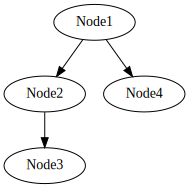

In [9]:
graph

### Example 2: Controlling output format

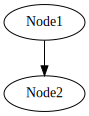

In [10]:
# A different output format can be specified when graph is created
graph2 = Digraph('graphviz2', format='svg')
graph2.node('Node1')
graph2.node('Node2')
graph2.edge('Node1', 'Node2')

# or at any point
# graph2.format = 'svg'
# graph2.directory = '.'
graph2.render()
graph2

### Example 3: Setting node, graph, and edge attributes

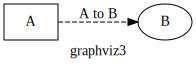

In [11]:
graph3 = Digraph(
    'graphviz3',
    format='svg',
    node_attr={'shape': 'rectangle'},
    graph_attr={'rankdir': 'LR', 'label': 'graphviz3'},
    edge_attr={'style': 'dashed'},
)
graph3.node('A')
graph3.node('B', shape='oval')
graph3.edge('A', 'B', label="A to B")
graph3

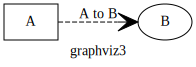

In [12]:
# You can change node, graph, and edge attributes as you build the graph
graph3.edge_attr.update(arrowhead='vee', arrowsize='2')
graph3

In [13]:
print(graph3.source)

digraph graphviz3 {
	graph [label=graphviz3 rankdir=LR]
	node [shape=rectangle]
	edge [arrowhead=vee arrowsize=2 style=dashed]
	A
	B [shape=oval]
	A -> B [label="A to B"]
}



### Example 4: Using Graph.attr to change node, edge attributes

In [14]:
# Change node (or edge) attributes as you add nodes and edges
graph4 = Digraph('graphviz4', format='svg')
graph4.attr('node', shape='oval')
graph4.node('A')
graph4.attr('node', shape='triangle')
print(graph4.source)

digraph graphviz4 {
	node [shape=oval]
	A
	node [shape=triangle]
}



### `build_digraph`

To cutback on the length of these exmples I've added a factory function to create Digraphs that are arranged left-to-right and use svg for the output format.

In [15]:
def build_digraph(num, graph_attr=None, node_attr=None, edge_attr=None):
    default_graph_attr = {'rankdir': 'LR'}
    if graph_attr:
        default_graph_attr.update(graph_attr)
    node_attr = node_attr or {}
    edge_attr = edge_attr or {}
    return Digraph(
        f'graphviz{num}',
        format='svg',
        graph_attr=default_graph_attr,
        node_attr=node_attr,
        edge_attr=edge_attr,
    )

### Example 5: Using Compass Points

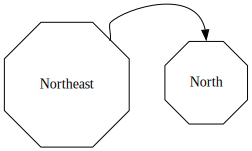

In [16]:
graph5 = build_digraph(
    5,
    node_attr={'shape': 'polygon', 'sides': '8', 'regular': 'true'},
)
# In DOT this would be:  Northeast:ne -> North:n
graph5.edge('Northeast:ne', 'North:n')
graph5

### Example 6: "Newline" characters for text alignment

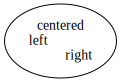

In [17]:
graph6 = build_digraph(6)
graph6.node('A', 'centered\nleft\\lright\\r')
graph6

### Example7:  HTML-like Labels

By enclosing the label in <, > you can use HTML elements in the label.

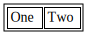

In [18]:
graph7 = build_digraph(7, node_attr={'shape': 'plain'})
graph7.node('B', '<<table><tr><td>One</td><td>Two</td></tr></table>>')
graph7

![valid html](valid_html_venn.svg)

### Example 8: Escaping HTML

Use the nohtml function if you want to have a label that starts w/ '<' and ends with '>'

In [19]:
from graphviz import nohtml
graph8 = build_digraph(10)
graph8.node(
    'diamond',
    shape='plain',
    label=nohtml('<blurgh>'),
)
graph8

### Example 9: Subgraph

You can create and additional graphs and add it as a subgraph

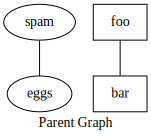

In [20]:
from graphviz import Graph

# Example from graphviz (Python library) User Guide
graph9 = Graph('graph9', graph_attr={'label': 'Parent Graph'})
graph9.edge('spam', 'eggs')

subgraph_a = Graph(name='child', node_attr={'shape': 'box'})
subgraph_a.edge('foo', 'bar')

graph9.subgraph(subgraph_a)
graph9

In [21]:
print(graph9.source)

graph graph9 {
	graph [label="Parent Graph"]
	spam -- eggs
	subgraph child {
		node [shape=box]
		foo -- bar
	}
}



### Example 10: Using Graph.subgraph as a context Manager

Using `Graph.subgraph` as a context manager can provide cleaner syntax (i.e. nested code structure for nested graphs)

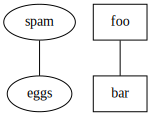

In [22]:
graph10 = Graph('parent')  
graph10.edge('spam', 'eggs')

with graph10.subgraph(
    name='child',
    node_attr={'shape': 'box'}
) as subgraph_a:
    subgraph_a.edge('foo', 'bar')
graph10

### Example 11: Cluster

As in DOT, the difference between creating a subgraph and creating a cluster is all in how you name it.

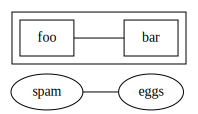

In [23]:
graph11 = Graph(
    'parent', graph_attr={'rankdir': 'LR'},
)
graph11.edge('spam', 'eggs')

with graph11.subgraph(
    name='cluster_child',
    node_attr={'shape': 'box'},
) as subgraph_a:
    subgraph_a.edge('foo', 'bar')
graph11

## Layout Engines

### circo

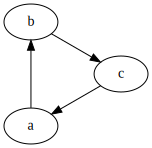

In [24]:
graph14 = Digraph('14', engine="circo")
for pair in "ab,bc,ca".split(','):
    graph14.edge(pair[0], pair[1])
graph
graph14

### twopi

In [25]:
graph15 = Digraph('15', engine='twopi')
for i in range(1, 7):
    graph15.edge('0', str(i))
    for j in range(1, 3):
        graph15.edge(str(i), f"{i}{j}")

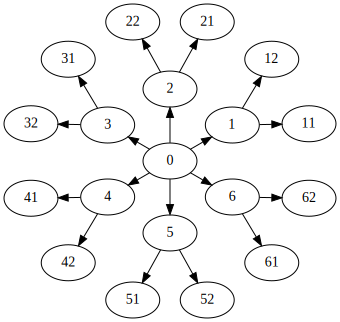

In [26]:
graph15 

## Diagrams

The diagrams library is handy for creating architecture diagrams of systems.  diagrams provides a large number of Node types with the logos for variaous technologies.  In particular there's a lot of Nodes for various cloud offerings.

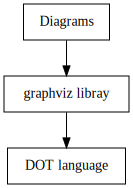

In [27]:
stack2_graph = build_digraph('stack2', graph_attr={'rankdir': 'TB'})
stack2_graph.attr('node', shape='rectangle')
labels = ('Diagrams', 'graphviz libray', 'DOT language')
for i in range(len(labels) - 1):
    stack2_graph.edge(labels[i], labels[i+1])
stack2_graph

### Installation

To install diagrams library

`pip install diagrams`

In [28]:
!pip install diagrams

### Example 12: 1-Node Diagram

In [29]:
from diagrams import Diagram
from diagrams.aws.compute import EC2

with Diagram(
    "Simple Diagram",  # diagram title
    show=False,  # by default Diagram opens file in viewer
    outformat="svg",
) as diagram:
    EC2("PROD App Server") # Create an EC2 node

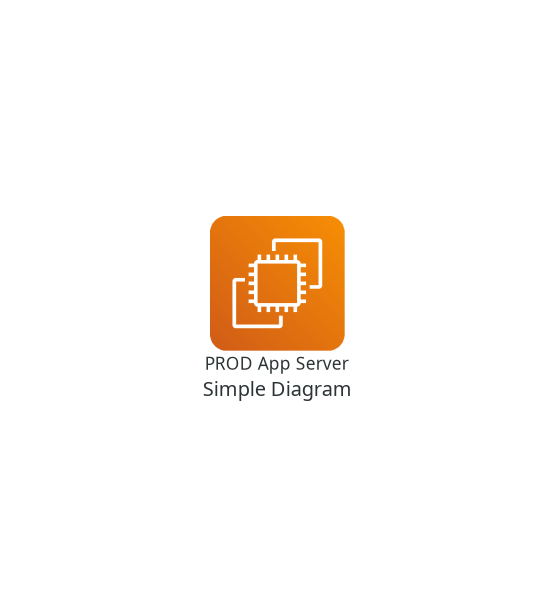

In [30]:
# Note: that this will also create a file.  With 
# filename based on the diagram title.
diagram

In [31]:
# Here I created a sub-class of Diagram that automatically sets some options
# and attribute.  A lot of this is aimed at reducing the amount of blank
# space around the graph.
class DemoDiagram(Diagram):
    def __init__(self, label, **kwargs):
        default_kwargs = {
            'show': False,
            'outformat': 'svg',
            'graph_attr': {
                'pad': '0.125',
                'nodesep': '0.15',
                "ranksep": "0.325",
            },
            'node_attr': {
                "width": "1",
                "height": "1",
            },
        }
        default_kwargs.update(kwargs)
        super().__init__(label, **default_kwargs)

### Example 13: Connecting Nodes with Edges

* `-` is an undirected edge
* `<<` and `>>` (left and right shift operators) are for directional edges
* Be careful with operator precedence `-` has higher priority than shift operators.

In [32]:
from diagrams.aws.database import RDS
from diagrams.aws.storage import S3

with DemoDiagram("NOW WITH EDGES!") as diagram2:
    EC2("Webserver") - RDS("DB") >> S3("Data Swamp") << S3("Data Lake")

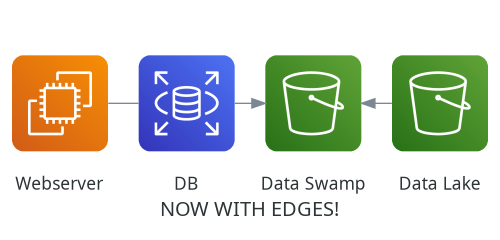

In [33]:
# EC2("Webserver") - RDS("DB") >> S3("Data Swamp") << S3("Data Lake")
diagram2

### Example 14: Define Nodes then connect them

* As with the graphviz library, you can define your node then connect them later.
* The onprem library is handy, since it has nodes for a lot of different webservers, datbases, etc.

In [34]:
from diagrams.onprem.network import Apache, Tomcat
from diagrams.onprem.database import MySQL
with DemoDiagram("Java Stack") as diagram3:
    web = Apache('webserver')
    app = Tomcat('apserver')
    db = MySQL('database')
    web - app - db

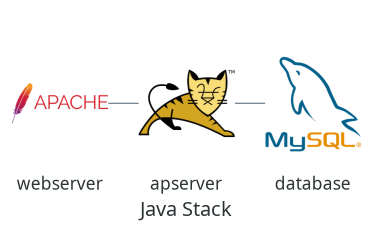

In [35]:
# web - app - db
diagram3

### Example 15: Edge Objects

* To add edges with attributes, use the Edge class.
* The shift or minus operator control which direction the edge points.

In [36]:
from diagrams import Edge
from diagrams.generic.os import (
    LinuxGeneral, Debian, RedHat, Centos, Ubuntu)
with DemoDiagram("Incorrect Linux Begats") as diagram4:
    linux, red_hat, debian = LinuxGeneral(), RedHat(), Debian()
    linux >> Edge(color='red') >> red_hat
    linux >> Edge(color='blue') << debian # 2-way arrow
    # no-way arrow
    red_hat - Edge(label='Nice OS ya got there') - Centos()
    # 2-way arrow
    debian << Edge(color="green", style="bold") >> Ubuntu()

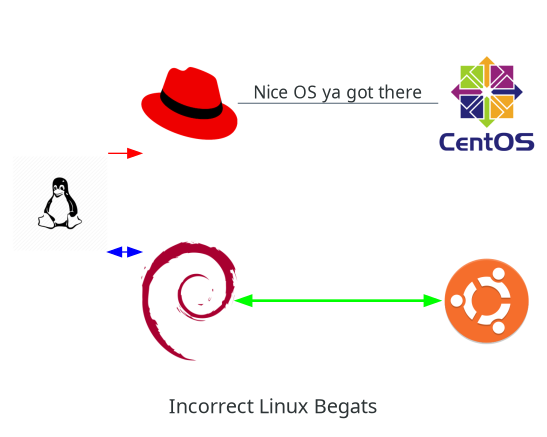

In [37]:
diagram4

### Example 16: Clusters

In [38]:
from diagrams import Cluster
from diagrams.programming.framework import (
    Angular, Django, Flask, React)
with DemoDiagram("Frameworks") as diagram5:
    with Cluster('Python'):
        d = Django()
        Flask()
    with Cluster('JavaScript'):
        a = Angular()
        React()
    # invisible edge to force clusters to be side-by-side
    d >> Edge(style="invis") >> a

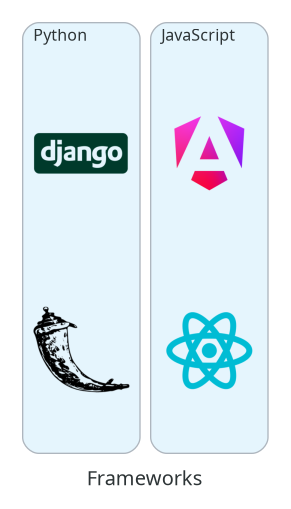

In [39]:
diagram5

### Example 17: Nested Clusters

In [40]:
with DemoDiagram("Nested Clusters") as diagram6:
    with Cluster("Corporate Network"):
        with Cluster("Accident, MD Datacenter"):
            ap0 = Apache()
            tc0 = Tomcat()
            my0 = MySQL()
            ap0 - tc0 - my0
        with Cluster("Bacon Level, AL Datacenter", direction='TB'):
            ap1 = Apache()
            tc1 = Tomcat()
            my1 = MySQL()
            ap1 - tc1 - my1
        my0 - my1

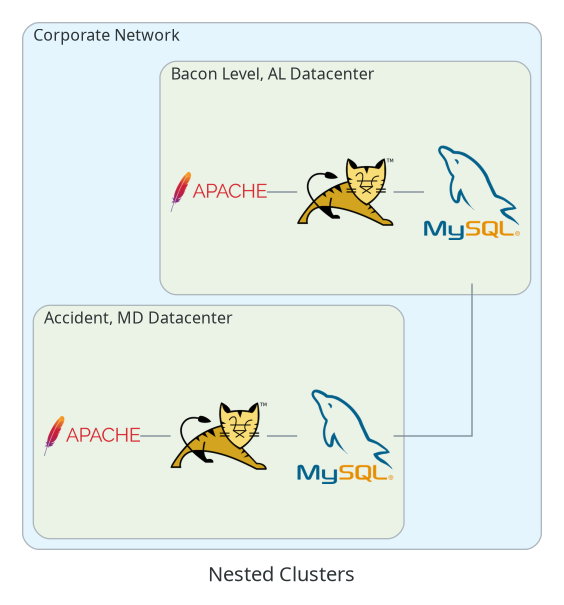

In [41]:
diagram6

### Reading Diagrams source code

The Diagrams documenation is rather hit or miss.  Sometimes you need to read the code.

* The code is farily well organized and pretty easy to read (especially if you've had some experience working with the graphviz python library)
* A lot of code lives in the `__init__.py` files, look there first

## Other Things to try

1. The various node types in Diagrams
2. Other layout engines in Graphviz
3. The Record shape in Graphviz (This has largely been superceded by HTML labels)

*Record-based shape example from Graphviz User's Guide*

![record-based shape example](record_based_shape.svg)


## Resources

* [graphviz.org](https://graphviz.org/)
* [graphviz (Python Library)](https://graphviz.readthedocs.io/en/stable/)
* [HTML labels](https://graphviz.org/doc/info/shapes.html#html)
* [Diagrams (Python Library) - documentation](https://diagrams.mingrammer.com/docs/getting-started/installation)
* [Diagrams (Python Library) - Github Repo](https://github.com/mingrammer/diagrams)

Github Repo for this Presentation:

* [https://github.com/jocassid/Talk-GraphvizAndPython](https://github.com/jocassid/Talk-GraphvizAndPython)